In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import numpy as np

from mflex.simulate.simulate_boundary import dipole

from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield, lf3d, j3d
from mhsflex.vis import plot
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt

from mflex.model.field.utility.poloidal import (
    phi,
    phi_low,
    phi_hypgeo,
    dphidz_hypgeo,
    dphidz,
    dphidz_low,
)

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)
c1 = (0.439, 0.788, 1.000)
c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 20.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 20.0
zmin = 0.0
zmax = 20.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 2.0

nf_max = 200

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y) * B_PHOTO

data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nresol_x,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

In [4]:
a = 0.44
alpha = 0.05
b = 1.0
z0 = 2.0

In [5]:
data3d_02 = calculate_magfield(data2d, a, b, alpha, z0, 0.2)
data3dNW_02 = calculate_magfield(data2d, a, b, alpha, z0, 0.2, asymptotic=False)
data3d_10 = calculate_magfield(data2d, a, b, alpha, z0, 1.0)
data3dNW_10 = calculate_magfield(data2d, a, b, alpha, z0, 1.0, asymptotic=False)
data3d_20 = calculate_magfield(data2d, a, b, alpha, z0, 2.0)
data3dNW_20 = calculate_magfield(data2d, a, b, alpha, z0, 2.0, asymptotic=False)

In [8]:
ix_max = np.unravel_index(data3d_20.bz.argmax(), data3d_20.bz.shape)[1]
iy_max = np.unravel_index(data3d_20.bz.argmax(), data3d_20.bz.shape)[0]

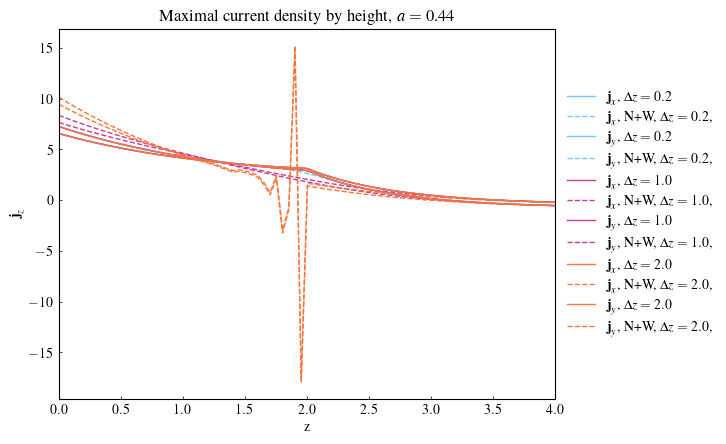

In [12]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_02.z,
    data3d_02.field[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="solid",
    color=c1,
    label=r"$\textbf{j}_x$, $\Delta z = 0.2$",
)
ax1.plot(
    data3d_02.z,
    data3dNW_02.field[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="--",
    color=c1,
    label=r"$\textbf{j}_x$, N+W, $\Delta z = 0.2$, ",
)
ax1.plot(
    data3d_02.z,
    data3d_02.field[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="solid",
    color=c1,
    label=r"$\textbf{j}_y$, $\Delta z = 0.2$",
)
ax1.plot(
    data3d_02.z,
    data3dNW_02.field[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="--",
    color=c1,
    label=r"$\textbf{j}_y$, N+W, $\Delta z = 0.2$, ",
)

ax1.plot(
    data3d_02.z,
    data3d_10.field[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="solid",
    color=c5,
    label=r"$\textbf{j}_x$, $\Delta z = 1.0$",
)
ax1.plot(
    data3d_02.z,
    data3dNW_10.field[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="--",
    color=c5,
    label=r"$\textbf{j}_x$, N+W, $\Delta z = 1.0$, ",
)
ax1.plot(
    data3d_02.z,
    data3d_10.field[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="solid",
    color=c5,
    label=r"$\textbf{j}_y$, $\Delta z = 1.0$",
)
ax1.plot(
    data3d_02.z,
    data3dNW_10.field[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="--",
    color=c5,
    label=r"$ \textbf{j}_y$, N+W, $\Delta z = 1.0$, ",
)

ax1.plot(
    data3d_02.z,
    data3d_20.field[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="solid",
    color=c10,
    label=r"$\textbf{j}_x$, $\Delta z = 2.0$",
)
ax1.plot(
    data3d_02.z,
    data3dNW_20.field[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="--",
    color=c10,
    label=r"$\textbf{j}_x$, N+W, $\Delta z = 2.0$, ",
)
ax1.plot(
    data3d_02.z,
    data3d_20.field[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="solid",
    color=c10,
    label=r"$\textbf{j}_y$, $\Delta z = 2.0$",
)
ax1.plot(
    data3d_02.z,
    data3dNW_20.field[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="--",
    color=c10,
    label=r"$\textbf{j}_y$, N+W, $\Delta z = 2.0$, ",
)

# ax1.plot(
#     data3d_02.z,
#     data3d_02.field[iy_max, ix_max, :, 2],
#     linewidth=1.0,
#     linestyle="solid",
#     color=c2,
#     label=r"$\textbf{j}_z$, $\Delta z = 0.2$",
# )
# ax1.plot(
#     data3d_02.z,
#     data3dNW_02.field[iy_max, ix_max, :, 2],
#     linewidth=1.0,
#     linestyle="--",
#     color=c2,
#     label=r"$\textbf{j}_z$, N+W, $\Delta z = 0.2$, ",
# )

# ax1.plot(
#     data3d_02.z,
#     data3d_10.field[iy_max, ix_max, :, 2],
#     linewidth=1.0,
#     linestyle="solid",
#     color=c4,
#     label=r"$\textbf{j}_z$, $\Delta z = 1.0$",
# )
# ax1.plot(
#     data3d_02.z,
#     data3dNW_10.field[iy_max, ix_max, :, 2],
#     linewidth=1.0,
#     linestyle="--",
#     color=c4,
#     label=r"$\textbf{j}_z$, N+W, $\Delta z = 1.0$, ",
# )

# ax1.plot(
#     data3d_02.z,
#     data3d_20.field[iy_max, ix_max, :, 2],
#     linewidth=1.0,
#     linestyle="solid",
#     color=c8,
#     label=r"$\textbf{j}_z$, $\Delta z = 2.0$",
# )
# ax1.plot(
#     data3d_02.z,
#     data3dNW_20.field[iy_max, ix_max, :, 2],
#     linewidth=1.0,
#     linestyle="--",
#     color=c8,
#     label=r"$\textbf{j}_z$, N+W, $\Delta z = 2.0$, ",
# )


ax1.set_xlabel("z")
plt.xlim([0, 2 * z0])
ax1.tick_params(direction="in", length=2, width=0.5)
#
plt.title(
    r"Maximal current density by height, $a =$ " + str(a)
)
lines1, labels1 = ax1.get_legend_handles_labels()
#
lines = lines1 #
labels = labels1 #
ax1.set_ylabel(r"$\textbf{j}_z$")
#ax2.set_ylabel(r"$(\textbf{j} \times \textbf{B})_x, (\textbf{j} \times \textbf{B})_y$")
plt.legend(lines, labels, frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
# plotname = "/Users/lilli/Desktop/Thesis/Performance/J/" + str(a) + "/maxJ_by_z_all.png"
# plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [6]:
compare_field3d(data3dNW_02, data3d_02)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9999864578823351 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9999996579174381 (Reference value:  1.0 )
Normalised vector error metric:  0.002274094490255491 (Reference value:  0.0 )
Mean vector error metric:  0.0006126601944476948 (Reference value:  0.0 )
Magnetic energy metric:  1.0018241022203394 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------


/Users/lilli/Desktop/mflex/mhsflex/metrics.py:274: RuntimeWarning: invalid value encountered in scalar divide
  temp = num / div


Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.9931297709923664
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEFFICIENT METRICS
-----------------------------------------------------------------------------------------------------------
Pearson Correlation reference value for pressure  PearsonRResult(statistic=0.9999999999999936, pvalue=0.0)
Pearson Correlation reference value for density  PearsonRResult(statistic=0.999999999999996, pvalue=0.0)
Pearson Correlation actual value for pressure  PearsonRResult(statistic=0.9999993764018373, pvalue=0.0)
Pearson Correlation actual value for density  PearsonRResult(statistic=0.9999999631453729, pvalue=0.0)


In [7]:
compare_field3d(data3dNW_10, data3d_10)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9985673363110956 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9999650117083528 (Reference value:  1.0 )
Normalised vector error metric:  0.03029650501107655 (Reference value:  0.0 )
Mean vector error metric:  0.013200621467708638 (Reference value:  0.0 )
Magnetic energy metric:  1.0258800215128316 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.9931297709923664
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEFFI

: 

In [8]:
compare_field3d(data3dNW_20, data3d_20)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9933419587631914 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9954101994636351 (Reference value:  1.0 )
Normalised vector error metric:  0.07428913170390189 (Reference value:  0.0 )
Mean vector error metric:  0.051645895678020914 (Reference value:  0.0 )
Magnetic energy metric:  1.0409900901718099 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------


In [8]:
deltaz = 0.2
data3d = data3d_02
data3dNW = data3dNW_02

folder = "/Users/lilli/Desktop/Thesis/Performance/fieldlines/" + str(a) + "/" + str(deltaz)
folderNW = folder + "/NW"

In [11]:
print(data3d.deltaz)

0.2


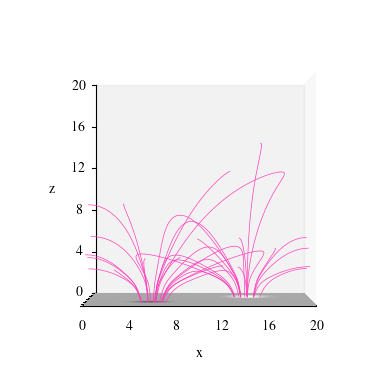

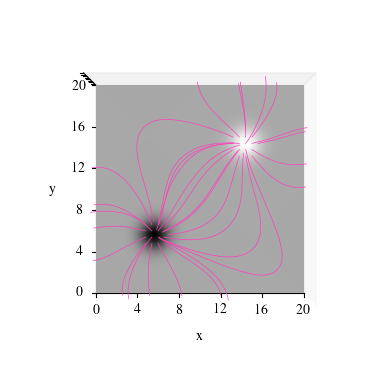

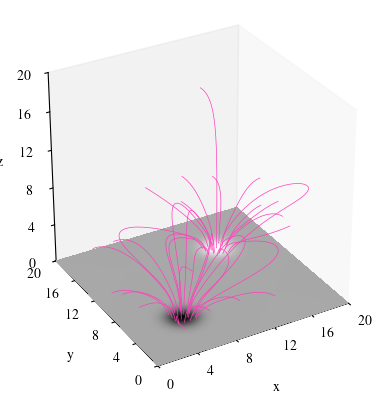

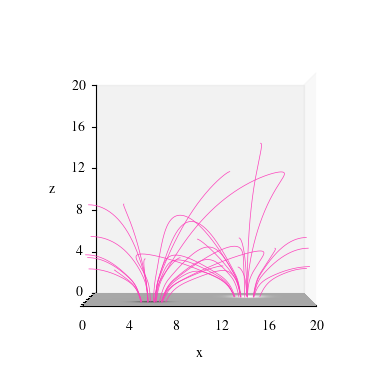

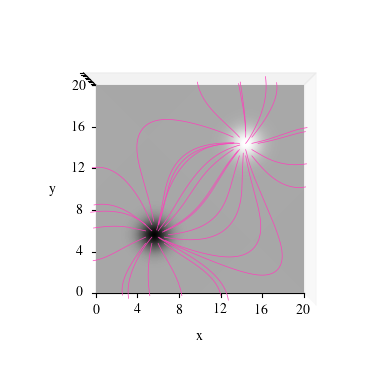

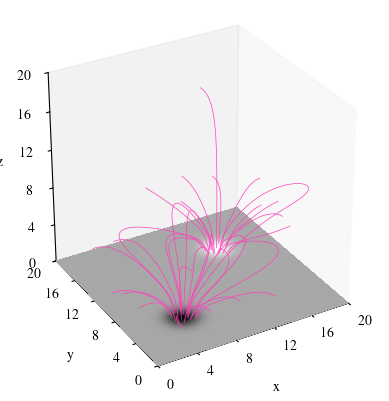

In [9]:
plot(data3dNW, "side", save=True, path=folderNW)
plot(data3dNW, "los", save=True, path=folderNW)
plot(data3dNW, "angular", save=True, path=folderNW)
plot(data3d, "side", save=True, path=folder)
plot(data3d, "los", save=True, path=folder)
plot(data3d, "angular", save=True, path=folder)